### [ここ](FFT.html)は理解してください。

In [1]:
import common
import numpy as np
%matplotlib inline

In [2]:
## ここでけ，ファイル名を指定する。
name = ["20180302_8.csv","20180302_8.csv"]
ff = ["open","close"]

In [3]:
def COP(fname,figname):
    datcop=common.Text2Numpy(filename=fname)
    r = common.FFT_cop(hz=14,df=datcop["cop"],start=100,end=2500,bias=False,sampling=0.01)[:,1:3]
    matrix,center,ang,d0,d1 = common.COPpca(r)
    common.FIGshow(figname,d0,d0@common.Rotation(matrix,0))
    dat = d0@common.Rotation(matrix,0)
    #矩形面積と総軌跡長
    a = np.max(dat,axis=0)-np.min(dat,axis=0)
    rectarea = a[0]*a[1]
    dat1 = np.diff(dat,axis=0)
    #dist = lambda x:np.sqrt(x[0]**2+x[1]**2)
    #dat2 = list(map(dist,dat1))
    #dat3 = sum(dat2)
    totaltraj = np.sum(np.linalg.norm(dat1,ord=2,axis=1))
    print(f"矩形面積:{rectarea}")
    print(f"総軌跡長：{totaltraj}")
    print(f"補正した角度：{ang}")
    print(f"中心点：x_{center[0]},y_{center[1]}")

open



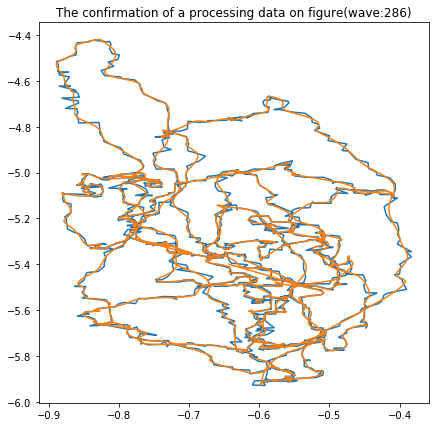

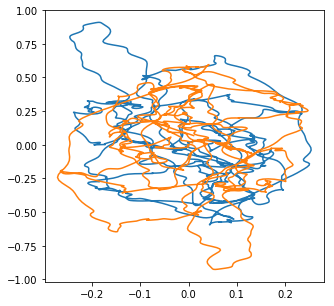

矩形面積:0.7934549986317886
総軌跡長：16.17528317316503
補正した角度：171.76033240592358
中心点：x_-0.6430869140625003,y_-5.3309042968750076



close



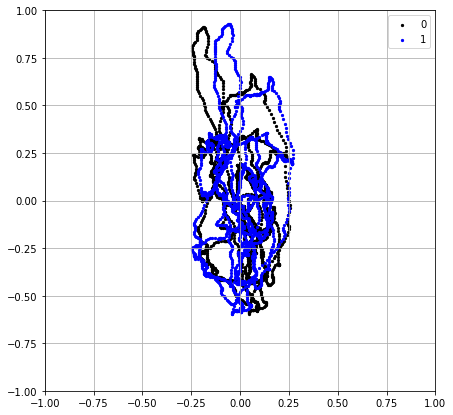

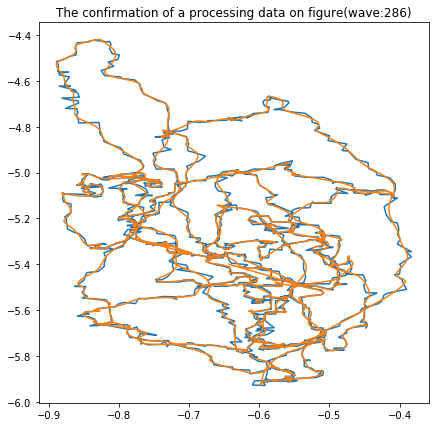

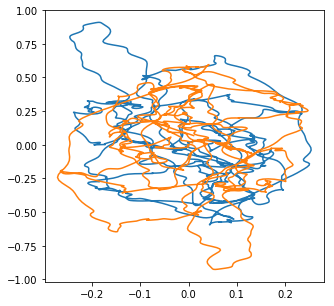

矩形面積:0.7934549986317886
総軌跡長：16.17528317316503
補正した角度：171.76033240592358
中心点：x_-0.6430869140625003,y_-5.3309042968750076





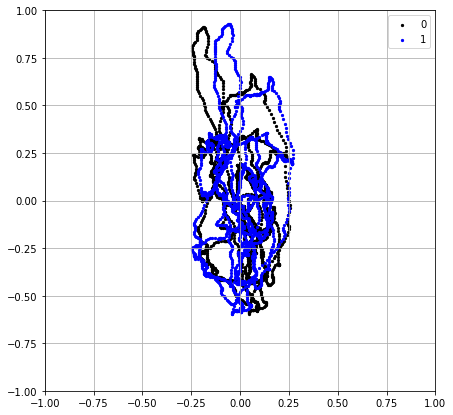

In [4]:
for n1,n2 in zip(name,ff):
    print(f"{n2}\n")
    COP(n1,n2)
    print("\n\n")